# Overview 

E. Pacuit (2019). [Voting Methods](https://plato.stanford.edu/entries/voting-methods/), Stanford Encyclopedia of Philosophy. 


![voting-intro](voting-intro.jpg)

## Rankings and Profiles

* $V$ is a finite set of voters.
* $X$ is a (typically finite) set of alternatives, or candidates.
* A relation $P$ on $X$ is a **linear order** if it is transitive (for all $x,y,z\in X$, if $x\mathrel{P} y$ and $y\mathrel{P} z$, then $x\mathrel{P} z$, irreflexive (there is no $x\in X$ with $x\mathrel{P}$), and complete (for all $x,y\in X$, either $x\mathrel{P} y$ or $y\mathrel{P} x$.   
* $\mathcal{L}(X)$ is the set of all linear orders over the set $X$.
* A **profile** for $X$ and $V$ is a function $\mathbf{P}$ assigning to $i\in V$ a linear order $\mathbf{P}_i$ on $X$. So, $a\mathbf{P}_ib$ means that voter $i$ strictly prefers candidate $a$ to $b$, or $a$ is ranked above $b$. Let $X(\mathbf{P})$ be the candidates in $\mathbf{P}$ and $V(\mathbf{P})$ the voters in $\mathbf{P}$. 
* For a profile $\mathbf{P}$ and candidates $x,y\in X(\mathbf{P})$, the **margin for $x$ over $y$** is $$Margin_{\mathbf{P}}(x,y) = |\{i\mid x\mathrel{\mathbf{P}_i} y\}| -  |\{i\mid y\mathrel{\mathbf{P}_i} x\}|$$


In [10]:
# import the Profile class
from voting.profiles import Profile


In [11]:
num_cands = 3
rankings = [
    (0, 1, 2), 
    (2, 1, 0), 
    (1, 2, 0)
]
rcounts = [1, 2, 3] 
#1 voter with the ranking (0,1,2),
#2 voters with the ranking (2,1,0) and 
#3 voters with the ranking (1,2,0)num_cands = 3
prof = Profile(rankings, num_cands, rcounts=rcounts)
print(f"There are {prof.num_voters} voters in the profile.")

# display prof2  - the header is the number of voters with each ranking
prof.display()

There are 6 voters in the profile.
+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
| 0 | 2 | 1 |
| 1 | 1 | 2 |
| 2 | 0 | 0 |
+---+---+---+


In [12]:
rankings = [
    (0, 1, 2), 
    (2, 1, 0), 
    (1, 2, 0)
]
rcounts = [1, 2, 3] 
#1 voter with the ranking (0,1,2),
#2 voters with the ranking (2,1,0) and 
#3 voters with the ranking (1,2,0)num_cands = 3
cmap={0:"a", 1:"b", 2:"c"}
prof2 = Profile(rankings, num_cands, rcounts=rcounts, cmap=cmap)

# display prof2  - the header is the number of voters with each ranking
# the candidate names are used in cmap
prof2.display()

+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
| a | c | b |
| b | b | c |
| c | a | a |
+---+---+---+


There are a number of useful methods associated with a Profile.  Suppose that $\mathbf{P}$ is a profile and $a,b\in X(\mathbf{P})$.

* The support for $a$ over $b$ is $|\{i\in V(\mathbf{P})\mid a\mathrel{\mathbf{P}_i}b\}|$. 
* The **margin of $a$ over $b$ in $\mathbf{P}$** is $Margin_\mathbf{P}(a,b)=|\{i\in V(\mathbf{P})\mid a\mathrel{\mathbf{P}_i}b\}| -|\{i\in V(\mathbf{P})\mid b\mathrel{\mathbf{P}_i} a\}|.$
* Candidate $a$ is **majority preferred** to $b$ when $Margin_\mathbf{P}(a,b)> 0$.


In [13]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

prof.display()

c1 = 2
c2 = 3

print("")
print(f"The candidates are {list(prof.candidates)}")
print(f"support of {c1} over {c2}: ", prof.support(c1,c2))
print(f"support of {c2} over {c1}: ", prof.support(c2, c1))
print(f"Margin({c1},{c2}) =  ", prof.margin(c1,c2))
print(f"Margin({c2},{c1}) =  ", prof.margin(c2,c1))
print(f"{c1} is majority preferred to {c2} is ", prof.majority_prefers(c1,c2))
print(f"{c2} is majority preferred to {c1} is ", prof.majority_prefers(c2,c1))
print(f"The number of voters that rank {c1} in 1st place is ", prof.num_rank(c1, 1))
print(f"The number of voters that rank {c1} in 2nd place is ", prof.num_rank(c1, 2))
print(f"The size of a strict majority of voters is ", prof.strict_maj_size())


+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+

The candidates are [0, 1, 2, 3]
support of 2 over 3:  3
support of 3 over 2:  2
Margin(2,3) =   1
Margin(3,2) =   -1
2 is majority preferred to 3 is  True
3 is majority preferred to 2 is  False
The number of voters that rank 2 in 1st place is  1
The number of voters that rank 2 in 2nd place is  1
The size of a strict majority of voters is  3


In addition, there are methods for each of the following: 

* **Condorcet winner**: a candidate that is majority preferred to every other candidate (returns None if the Condorcet winner does not exist)
* **weak Condorcet winner**: a list of candidates that are not majority preferred by any other candidate (returns None if no such candidate exists) 
* **Condorcet loser**: a candidate that is majority dispreferred by every other candidate (returns None if the Condorcet loser does not exist)
* **Plurality scores**: a dictionary associating with each candidate its plurality score
* **Borda scores**: a dictionary associating with each candidate its Borda score

In [14]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

prof.display()
print("")
print(f"The plurality scores are ", prof.plurality_scores())
print(f"The Borda scores are ", prof.borda_scores())
print(f"The Condorcet winner is ", prof.condorcet_winner())
print(f"The weak Condorcet winner is ", prof.weak_condorcet_winner())
print(f"The Condorcet loser is ", prof.condorcet_loser())


+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+

The plurality scores are  {0: 1, 1: 2, 2: 1, 3: 1}
The Borda scores are  {0: 4, 1: 11, 2: 8, 3: 7}
The Condorcet winner is  1
The weak Condorcet winner is  [1]
The Condorcet loser is  0


##  Margin Graphs

The **margin graph** of a profile $\mathbf{P}$ is a weighted directed graph where the nodes are the candidates and there is an edge from $a$ to $b$ when $Margin_{\mathbf{P}}(a,b)>0,$ weighted by $Margin_{\mathbf{P}}(a,b)$.   

A margin graph for a Profile object is a networkx object. 

+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+
<class 'networkx.classes.digraph.DiGraph'>
The nodes are the candidates  [0, 1, 2, 3]
The edges are the majority relations  [(1, 0), (1, 2), (1, 3), (2, 0), (2, 3), (3, 0)]
The weights are the margins 
 Edge (1, 0): {'weight': 3}
 Edge (1, 2): {'weight': 3}
 Edge (1, 3): {'weight': 1}
 Edge (2, 0): {'weight': 3}
 Edge (2, 3): {'weight': 1}
 Edge (3, 0): {'weight': 1}


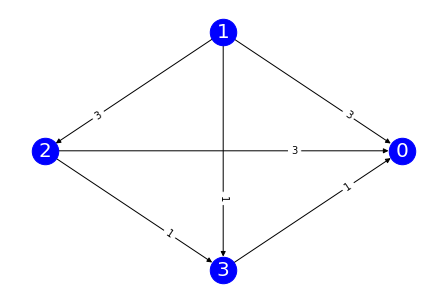

In [15]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

prof.display()

mg = prof.margin_graph()
# mg is a networkx object
print(type(mg))
print("The nodes are the candidates ", mg.nodes)
print("The edges are the majority relations ", mg.edges)
print("The weights are the margins \n", "\n ".join([f"Edge {e}: {mg.get_edge_data(*e)}" for e in mg.edges]))

# display the margin graph
prof.display_margin_graph()


### Majority Cycle

+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| 0 | 1 | 2 |
| 1 | 2 | 0 |
| 2 | 0 | 1 |
+---+---+---+


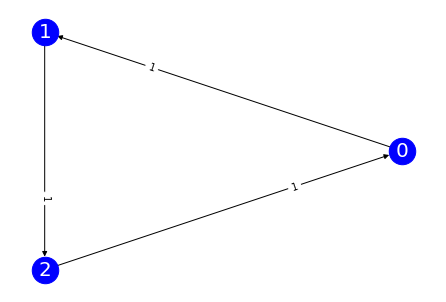

In [16]:
rankings = [
    (0, 1, 2), 
    (1, 2, 0), 
    (2, 0, 1)
]
num_cands = 3
prof = Profile(rankings, num_cands)

prof.display()

prof.display_margin_graph()


+---+---+---+
| 2 | 2 | 3 |
+---+---+---+
| 0 | 1 | 2 |
| 1 | 2 | 0 |
| 2 | 0 | 1 |
+---+---+---+


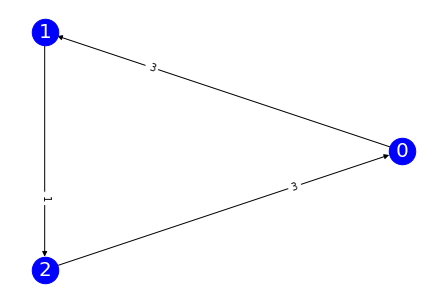

In [17]:
rankings = [
    (0, 1, 2), 
    (1, 2, 0), 
    (2, 0, 1)
]
rcounts = [2, 2, 3]
num_cands = 3
prof = Profile(rankings, num_cands, rcounts = rcounts)

prof.display()

prof.display_margin_graph()


## Voting Methods

A **voting method** is a function $F$ mapping profiles (in the domain of $F$) to non-empty set of candidates:  $\varnothing \neq F(\mathbf{P})\subseteq X(\mathbf{P})$


In [18]:
from voting.voting_methods import *
# all_vms is an list of all the voting methods that have been implemented
# all_vms_mg is a list of all voting methods that accept margin graphs as input

In [19]:

vms = [
    plurality, 
    borda,
    plurality_with_runoff,
    hare,
    coombs,
]

for vm in all_vms: 
    print(vm.name)
    print(vm.__doc__)
    


Plurality
A plurality winnner a candidate that is ranked first by the most voters
    
Borda
A Borda winner is a candidate with the larget Borda score. 
    
    The Borda score of the candidates is calculated as follows: If there are $m$ candidates, then 
    the Borda score of candidate $c$ is \sum_{r=1}^{m (m - r) * Rank(c,r)$ where $Rank(c,r)$ is the 
    number of voters that rank candidate $c$ in position $r$. 
    
Anti-Plurality
An anti-plurality winnner is a candidate that is ranked last by the fewest voters
Ranked Choice
If there is a majority winner then that candidate is the ranked choice winner
    If there is no majority winner, then remove all candidates that are ranked first by the fewest 
    number of voters.  Continue removing candidates with the fewest number first-place votes until 
    there is a candidate with a majority of first place votes.  
    
    Note: If there is  more than one candidate with the fewest number of first-place votes, then *all*
    such can

In [20]:
rankings = [
    (0, 1, 2, 3), 
    (2, 3, 1, 0), 
    (3, 1, 2, 0), 
    (1, 2, 0, 3), 
    (1, 3, 2, 0)
]
num_cands = 4
prof = Profile(rankings, num_cands)

prof.display()

for vm in vms: 
    print(f"{vm.name} winners: {vm(prof)}")


+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 2 | 3 | 1 | 1 |
| 1 | 3 | 1 | 2 | 3 |
| 2 | 1 | 2 | 0 | 2 |
| 3 | 0 | 0 | 3 | 0 |
+---+---+---+---+---+
Plurality winners: [1]
Borda winners: [1]
PluralityWRunoff winners: [1]
Ranked Choice winners: [1]
Coombs winners: [1]


In [21]:
rankings = [(0,1,2), (1,2,0), (2,0,1)]
rcounts = [2,2,1]
num_cands = 3
prof = Profile(rankings, num_cands, rcounts=rcounts)
prof.display()

for vm in vms: 
    print(f"{vm.name} winners: {vm(prof)}")


+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| 0 | 1 | 2 |
| 1 | 2 | 0 |
| 2 | 0 | 1 |
+---+---+---+
Plurality winners: [0, 1]
Borda winners: [1]
PluralityWRunoff winners: [0]
Ranked Choice winners: [0]
Coombs winners: [1]


## Voting Method Tutorial


<iframe width=650 height=700 src="https://voting-methods-tutorial.herokuapp.com/"></iframe>

## Online Voting Tools

1. [www.preflib.org](https://www.preflib.org/)
2. [voting.ml](https://voting.ml/)
3. [www.robovote.org](http://www.robovote.org/)
4. [civs.cs.cornell.edu/](https://civs.cs.cornell.edu/)
3. [www.fairvote.org](https://www.fairvote.org/)
5. [SF Open Source Voting (osvtac.github.io)](https://osvtac.github.io)